In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import random
from random import seed
from random import sample

tensorflow.test.gpu_device_name()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
title = "SWaT_Dataset_Normal_v0"
df = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1,Normal
496796,28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496797,28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496798,28/12/2015 9:59:58 AM,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.81710,1.649953,189.502700,0.000128,1,1,1,Normal


In [ ]:
df.fillna(0, inplace=True)
df = df[15000:]
df = df.drop(columns=[' Timestamp'])
df = df.drop(columns=['Normal/Attack'])
df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
15000,2.670147,651.2425,2,2,1,262.2404,8.386824,495.0269,2.471022,2,...,0.310604,2,1,253.4286,1.361612,192.6589,0.000128,1,1,1
15001,2.643564,651.7136,2,2,1,262.2404,8.386824,494.6680,2.471022,2,...,0.310604,2,1,253.4286,1.361612,192.6589,0.000128,1,1,1
15002,2.623387,651.9883,2,2,1,262.2404,8.386824,494.6680,2.471022,2,...,0.309067,2,1,253.4286,1.361612,192.6589,0.000128,1,1,1
15003,2.609935,652.3023,2,2,1,262.2404,8.386824,494.6680,2.471022,2,...,0.308619,2,1,253.4286,1.361612,192.6589,0.000128,1,1,1
15004,2.600327,652.4201,2,2,1,262.2404,8.388105,494.3860,2.471022,2,...,0.308619,2,1,253.4286,1.361612,192.6589,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,0.308619,2,1,250.8171,1.778105,189.8552,0.000128,1,1,1
496796,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,0.308619,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1
496797,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,2,...,0.308619,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1
496798,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.308619,2,1,250.8171,1.649953,189.5027,0.000128,1,1,1


In [ ]:
s1_df = df[['FIT101', 'LIT101', 'MV101', 'P101', 'P102']]
s2_df = df[['AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206']]
s3_df = df[['FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302']]
s4_df = df[['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401']]
s5_df = df[['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503']]
s6_df = df[['FIT601', 'P601', 'P602', 'P603']]

In [ ]:
title = "SWaT_Dataset_Attack_v0"
df_attack = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")

In [ ]:
df_attack[' Timestamp'] = pd.to_datetime(df_attack[' Timestamp'])

In [ ]:
s1_df_attack = df_attack[['FIT101', 'LIT101', ' MV101', 'P101', 'P102']]
s2_df_attack = df_attack[[' AIT201', 'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205', 'P206']]
s3_df_attack = df_attack[['FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'MV304', 'P301', 'P302']]
s4_df_attack = df_attack[['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401']]
s5_df_attack = df_attack[['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503']]
s6_df_attack = df_attack[['FIT601', 'P601', 'P602', 'P603']]
attack_status = df_attack[['Normal/Attack']]

In [ ]:
times = {
    "Type": [
        "SS-SP on P-102",
        "SS-SP on MV-504",
        "SS-SP on DPIT-301",
        "SS-MP on MV-101, LIT-101",
        "SS-MP on P-201, P-203, P-205",
        "MS-SP on P-101, LIT-301",
        "MS-SP on P-302, LIT-401",
        "MS-MP on P-602, DIT-301, MV-302",
        "MS-MP on LIT-101, P-101, MV-201"
    ],
    "Start": [
        "2015-12-28 10:51:08",
        "2015-12-28 11:47:39",
        "2015-12-28 13:10:10",
        "2015-12-29 18:30:00",
        "2015-12-31 15:32:00",
        "2015-12-29 17:04:56",
        "2015-12-31 01:17:08",
        "2015-12-30 01:42:34",
        "2015-12-31 15:47:40",
    ],
    "End": [
        "2015-12-28 10:58:30",
        "2015-12-28 11:54:08",
        "2015-12-28 13:26:13",
        "2015-12-29 18:42:00",
        "2015-12-31 15:34:00",
        "2015-12-29 17:29:00",
        "2015-12-31 01:45:18",
        "2015-12-30 01:54:10",
        "2015-12-31 16:07:10",
    ],
}

df_times = pd.DataFrame(times)
print(df_times)

                              Type                Start                  End
0                   SS-SP on P-102  2015-12-28 10:51:08  2015-12-28 10:58:30
1                  SS-SP on MV-504  2015-12-28 11:47:39  2015-12-28 11:54:08
2                SS-SP on DPIT-301  2015-12-28 13:10:10  2015-12-28 13:26:13
3         SS-MP on MV-101, LIT-101  2015-12-29 18:30:00  2015-12-29 18:42:00
4     SS-MP on P-201, P-203, P-205  2015-12-31 15:32:00  2015-12-31 15:34:00
5          MS-SP on P-101, LIT-301  2015-12-29 17:04:56  2015-12-29 17:29:00
6          MS-SP on P-302, LIT-401  2015-12-31 01:17:08  2015-12-31 01:45:18
7  MS-MP on P-602, DIT-301, MV-302  2015-12-30 01:42:34  2015-12-30 01:54:10
8  MS-MP on LIT-101, P-101, MV-201  2015-12-31 15:47:40  2015-12-31 16:07:10


In [ ]:
def getTimeIndex(timeStamp):
  return df_attack[df_attack[' Timestamp'] == timeStamp].index.tolist()[0]

In [ ]:
def mergeDfs(df1, df2):
  return pd.merge(df1, df2, left_index=True, right_index=True)

In [ ]:
def transformData(df):
    # Scale and transform the data
    for i in df.select_dtypes('object').columns:
        le = LabelEncoder().fit(df[i])
        df[i] = le.transform(df[i])

    x_scaler = MinMaxScaler()
    x_data = x_scaler.fit_transform(df)

    return x_data, x_scaler

In [ ]:
def getPredictions(df, model):
    x_data, scaler = transformData(df)
    x_normal = []
    y_normal = []

    for i in range(len(x_data) - 5):
        indices = range(i, i + 5)
        x_normal.append(x_data[indices])
        y_normal.append(x_data[i + 5])

    x_normal = np.array(x_normal)
    y_normal = np.array(y_normal)

    predictions_scaled = model.predict(x_normal)

    return x_data[:-5], predictions_scaled

In [ ]:
def mergeResiduals(y, y_pred):
    residuals = y - y_pred
    merged_res = np.zeros(len(residuals))
    for i, timestep in enumerate(residuals):
        sum_of_squares = sum(x ** 2 for x in timestep)
        merged_res[i] = sum_of_squares
    return merged_res

In [ ]:
def getThreshold(df1, df2, modelName):
  model = keras.models.load_model("/content/drive/MyDrive/CI Project/" + modelName + ".h5")
  normal, normal_pred = getPredictions(mergeDfs(df1, df2), model)

  normal = normal[:, -df2.shape[1]:]
  normal_pred = normal_pred[:, -df2.shape[1]:]

  print(normal.shape)
  print(normal_pred.shape)

  normalResiduals = mergeResiduals(normal, normal_pred)
  thresholdVal = 5 * np.std(normalResiduals)

  return thresholdVal

In [ ]:
def getResiduals(df1, df2, modelName):
  model = keras.models.load_model("/content/drive/MyDrive/CI Project/" + modelName + ".h5")
  attack, attack_pred = getPredictions(mergeDfs(df1, df2), model)

  attack = attack[:, -df2.shape[1]:]
  attack_pred = attack_pred[:, -df2.shape[1]:]

  return mergeResiduals(attack, attack_pred)

In [ ]:
def getCusum(residuals, title, start, end, buffer, threshold):
    # Get the residuals
    residuals = residuals[start - buffer:end + buffer]

    # NOT CUMSUM, it is CUSUM
    # tkae the square root of the sum of squares then subtract the average from the mean of the sum of squares
    # sqrt(x1 * x1 + x2 * x2 ) - mean(sqrt(x1 * x1 + x2 * x2 ))
    # then apply the cusum control chart which will ask for
    # k = thresold / 10
    # https://www.itl.nist.gov/div898/handbook/pmc/section3/pmc323.htm
    # ress and https://www.usenix.org/conference/usenixsecurity24
    # journal quality tehcnology jtt

    cusum_abs = np.cumsum(np.abs(residuals))  # Calculate absolute CUSUM values

    x = np.arange(start - buffer, end + buffer)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, cusum_abs[:len(x)], 'b-', label='Absolute CUSUM')
    ax.axhline(threshold, color='b', linestyle='--', label='Threshold')
    ax.axvline(x=start, color='g', linestyle='--', label='Attack Start')
    ax.axvline(x=end, color='r', linestyle='--', label='Attack End')
    ax.set_title(title + '  -  CUSUM')
    ax.set_xlabel('Time')
    ax.set_ylabel('CUSUM')
    ax.legend()
    ax.grid(True)
    plt.show()

In [ ]:
def getIntervals(df1, df2, modelName, threshold):
  residuals = getResiduals(df1, df2, modelName)
  for i in range(len(times["Type"])):
    intType = times["Type"][i]
    intStart = times["Start"][i]
    intEnd = times["End"][i]

    print("Start: " + intStart + "\tEnd: " + intEnd)

    cusumGraph = getCusum(residuals, modelName + " " + intType, getTimeIndex(intStart), getTimeIndex(intEnd), 500, threshold)
    print(cusumGraph)

## S1 Attack Predictions

In [ ]:
s1_threshold = getThreshold(s6_df, s1_df, "S6_S1_Model")
s1_threshold

15057/15057 [==============================] - 67s 4ms/step
(481795, 5)
(481795, 5)


0.15158369081718642

15057/15057 [==============================] - 21s 1ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


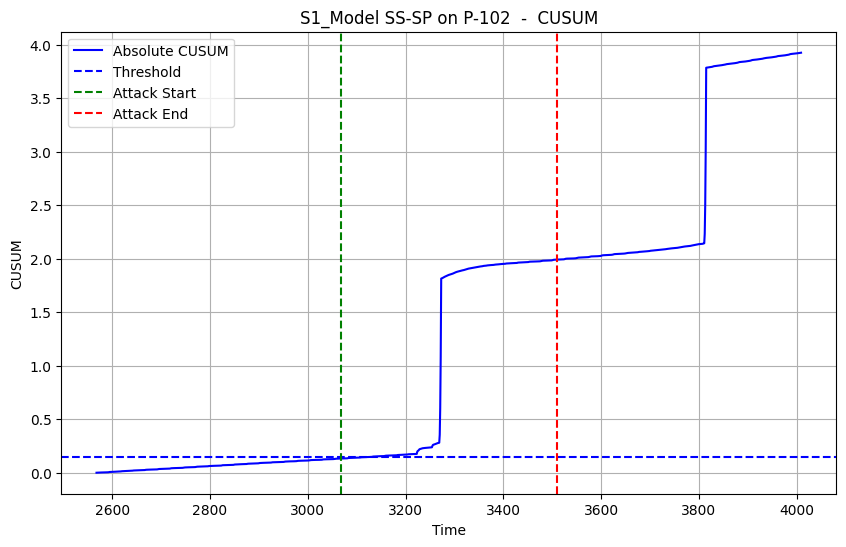

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


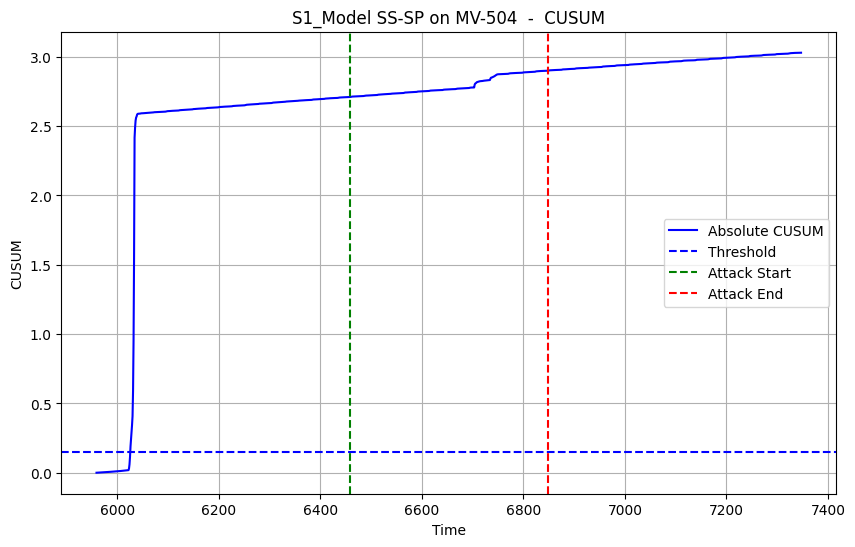

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


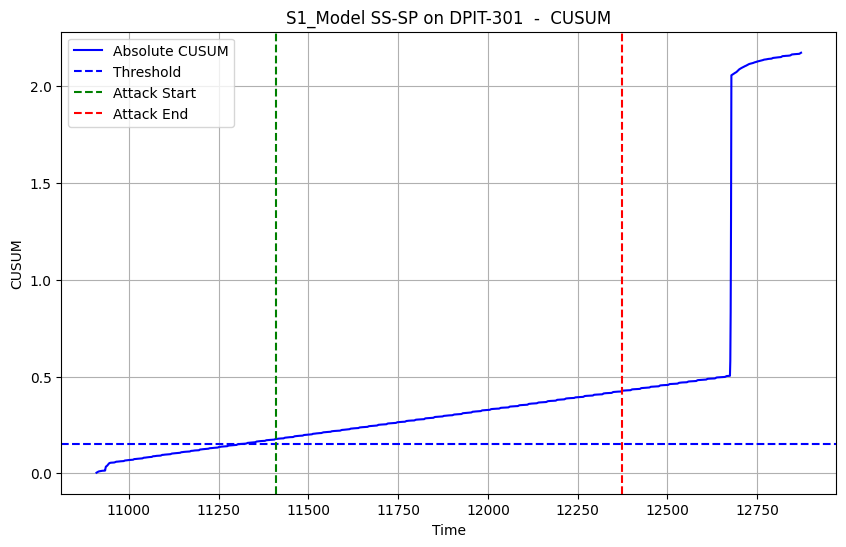

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


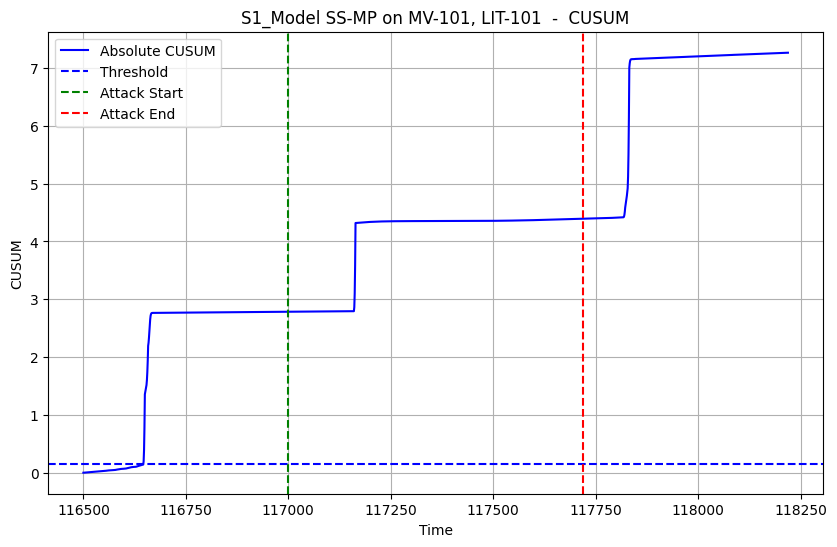

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


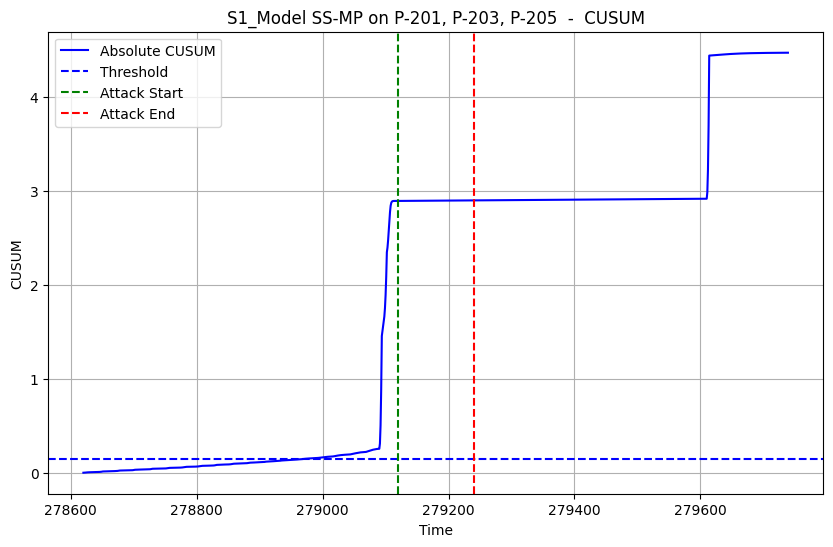

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


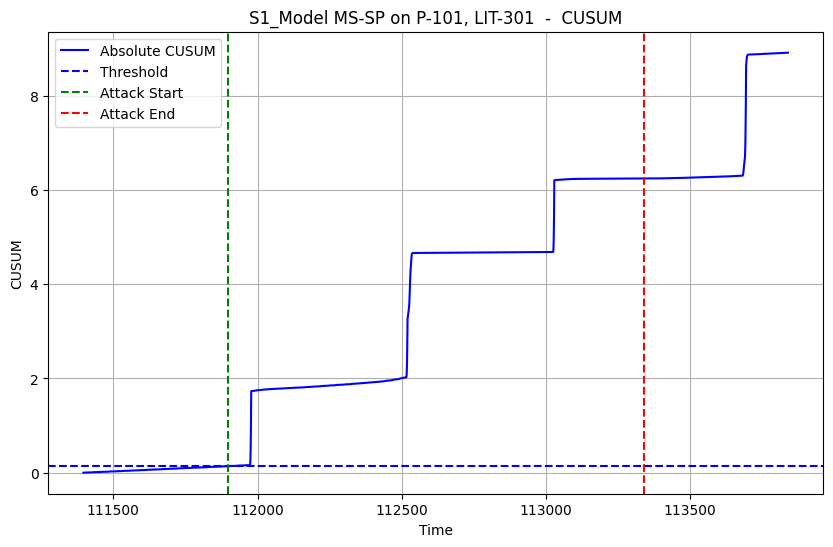

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


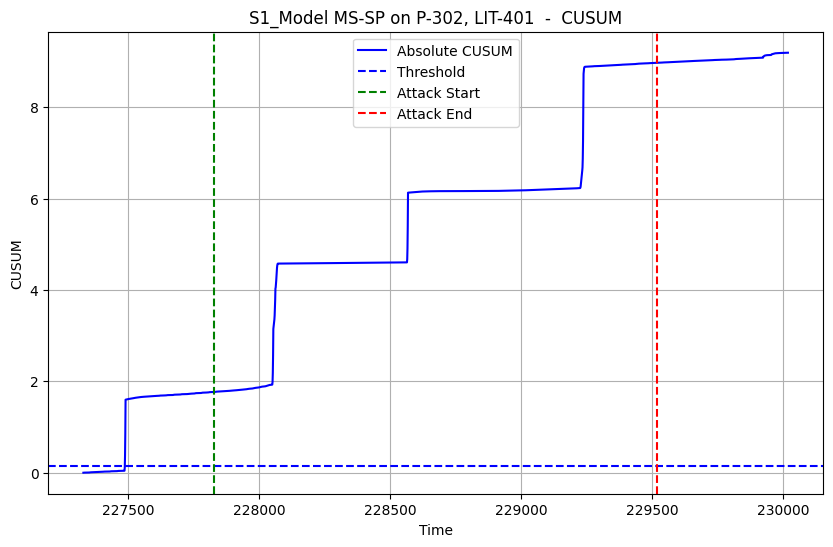

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


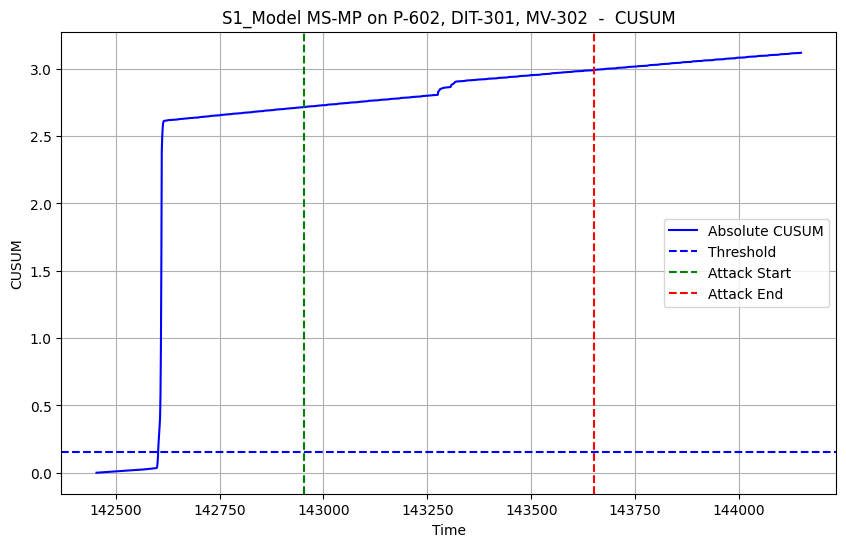

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


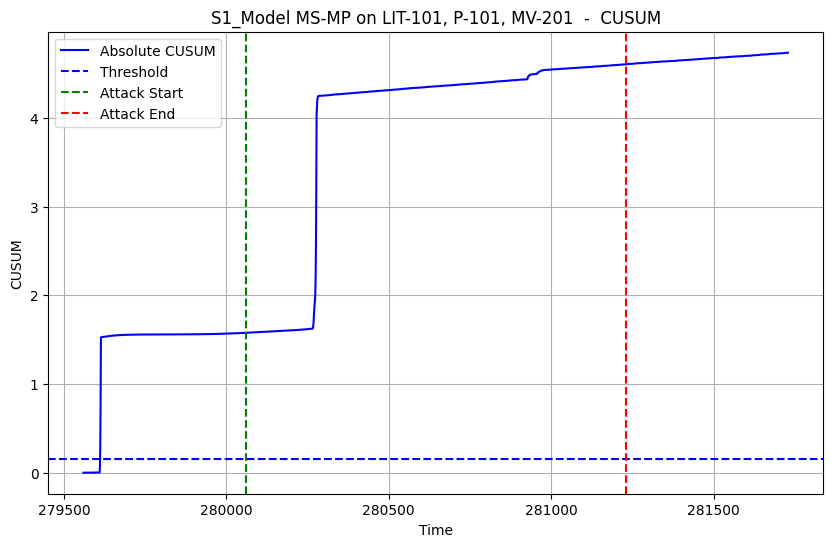

None


In [ ]:
getIntervals(s6_df, s1_df, "S6_S1_Model", s1_threshold)

## S2 Attack Predictions

In [ ]:
s2_threshold = getThreshold(s1_df, s2_df, "S1_S2_Model")
s2_threshold

15057/15057 [==============================] - 24s 2ms/step
(481795, 11)
(481795, 11)


0.4144332900868036

15057/15057 [==============================] - 21s 1ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


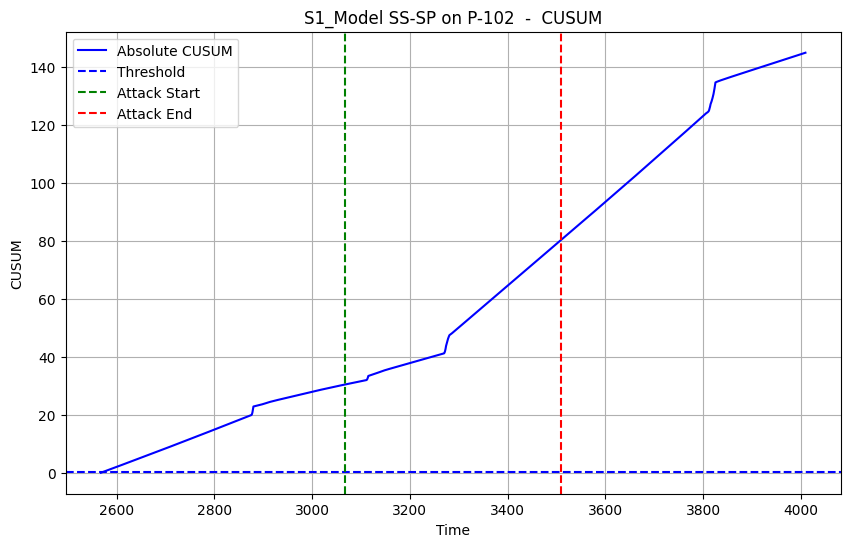

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


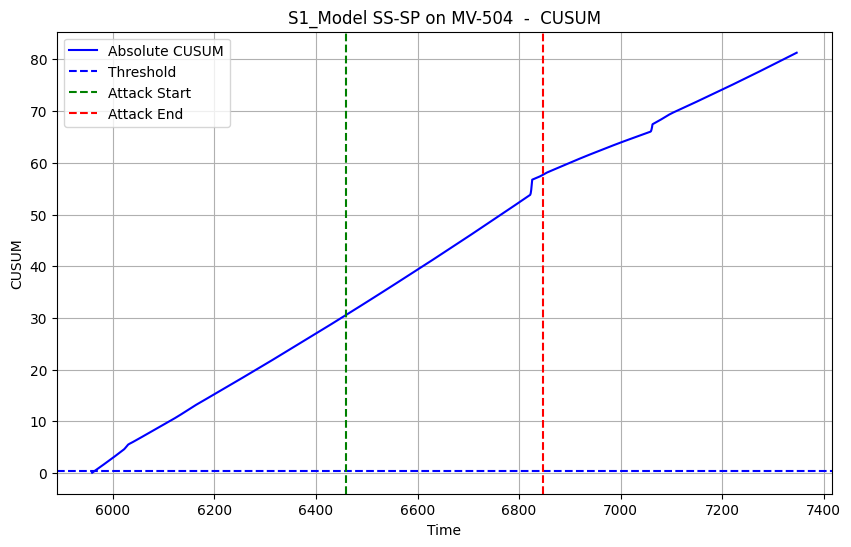

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


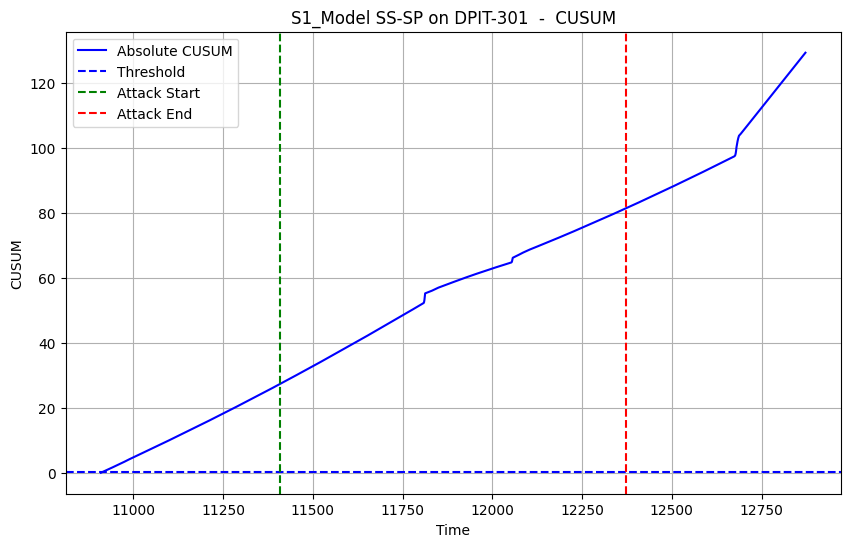

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


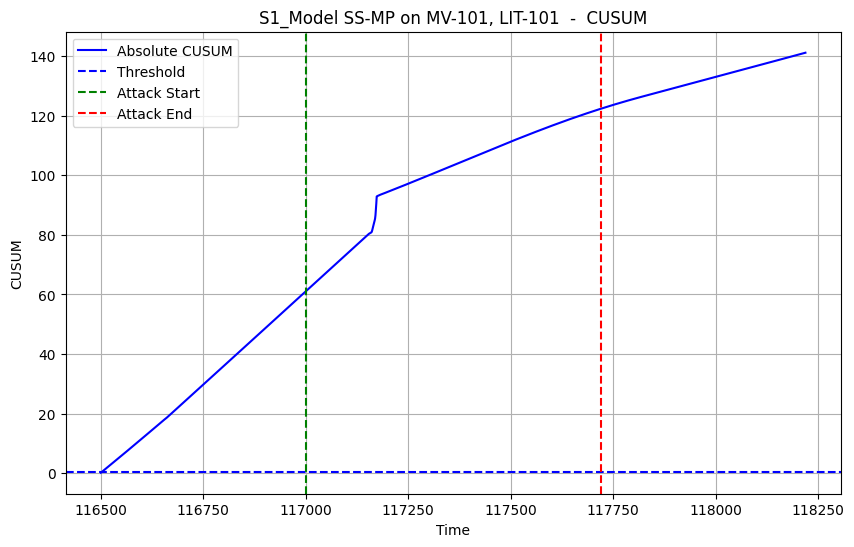

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


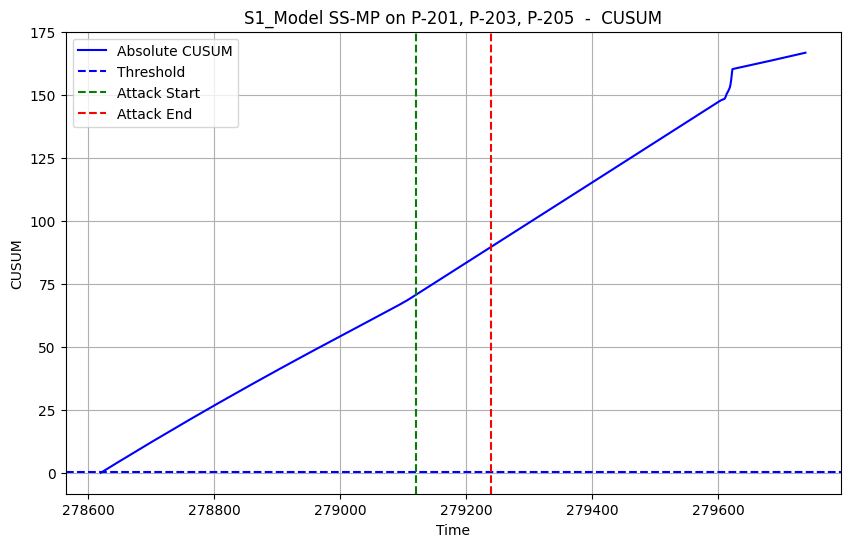

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


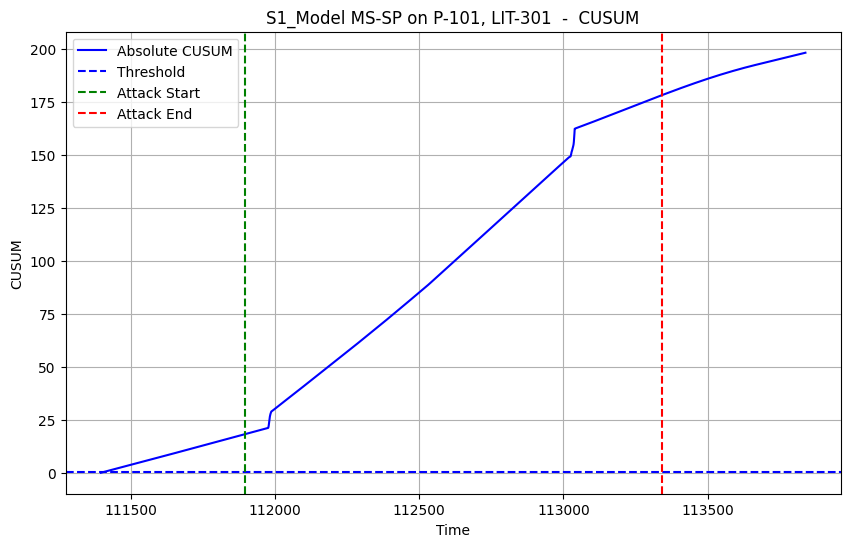

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


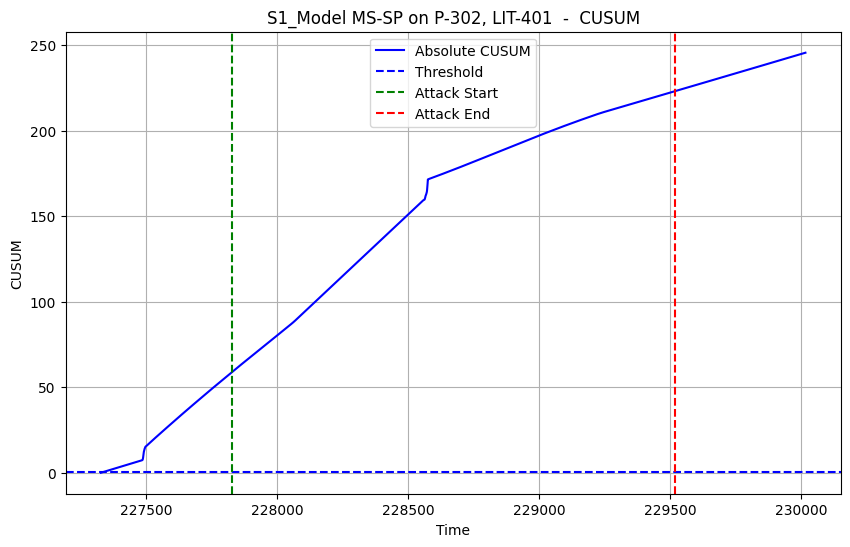

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


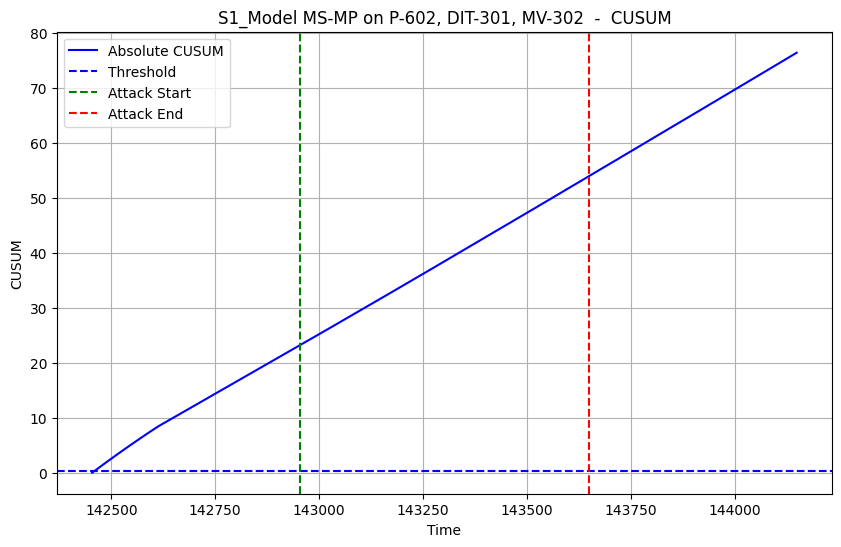

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


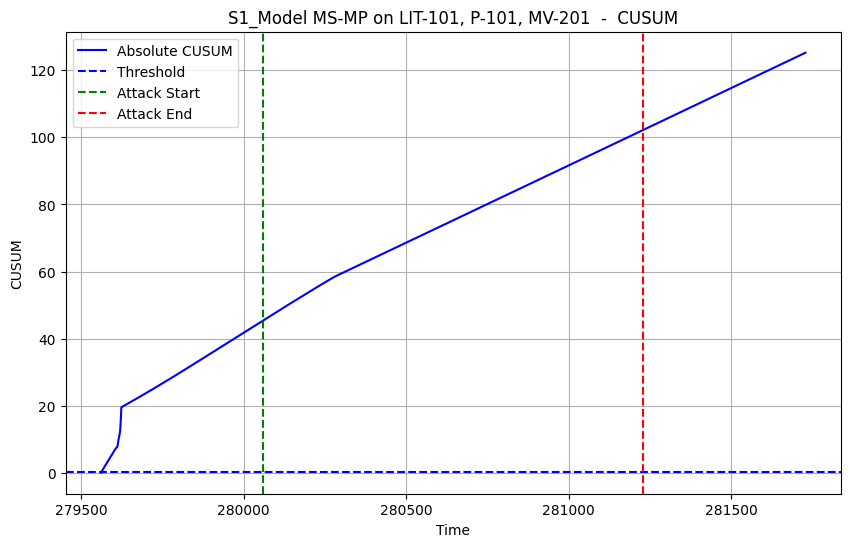

None


In [ ]:
getIntervals(s1_df, s2_df, "S1_S2_Model", s2_threshold)

## S3 Attaack Predictions

In [ ]:
s3_threshold = getThreshold(s2_df, s3_df, "S2_S3_Model")
s3_threshold

15057/15057 [==============================] - 27s 2ms/step
(481795, 8)
(481795, 8)


0.470556202474136

15057/15057 [==============================] - 21s 1ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


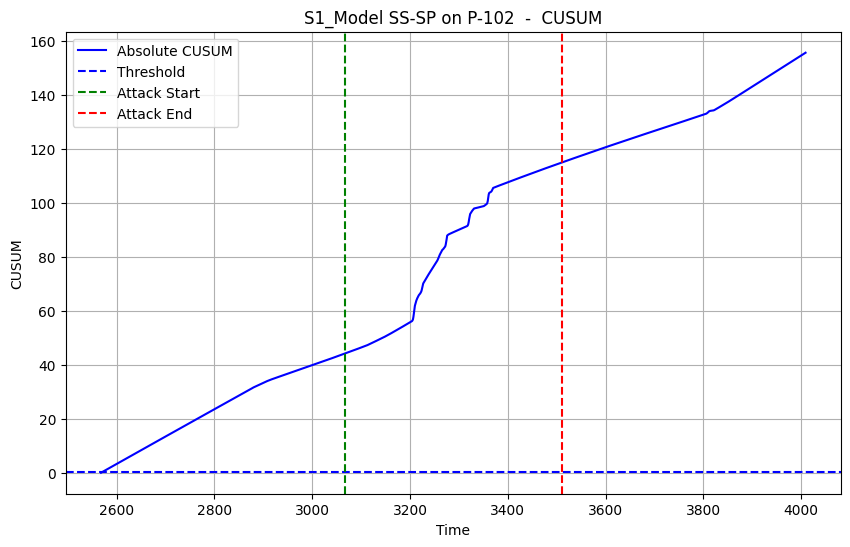

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


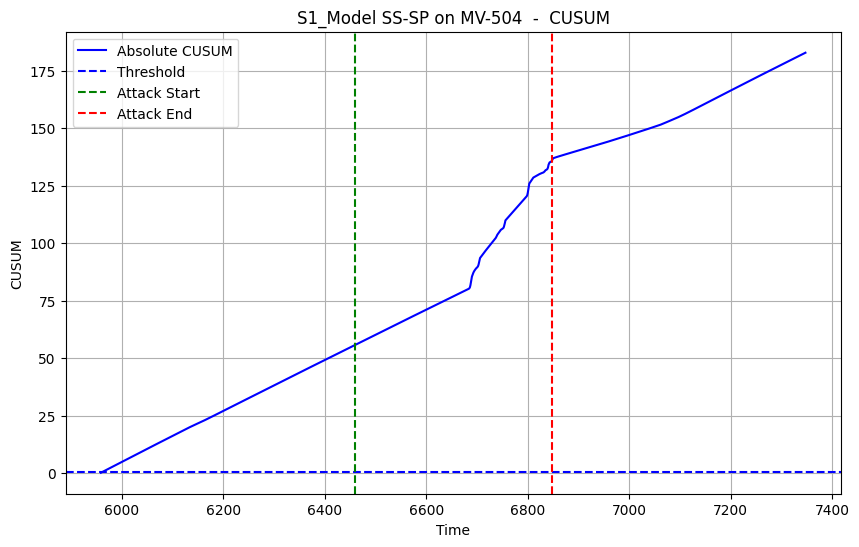

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


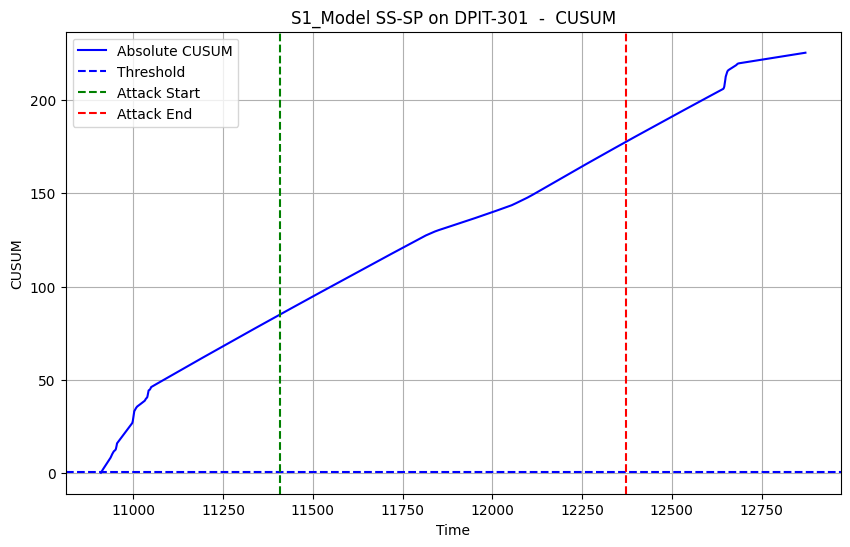

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


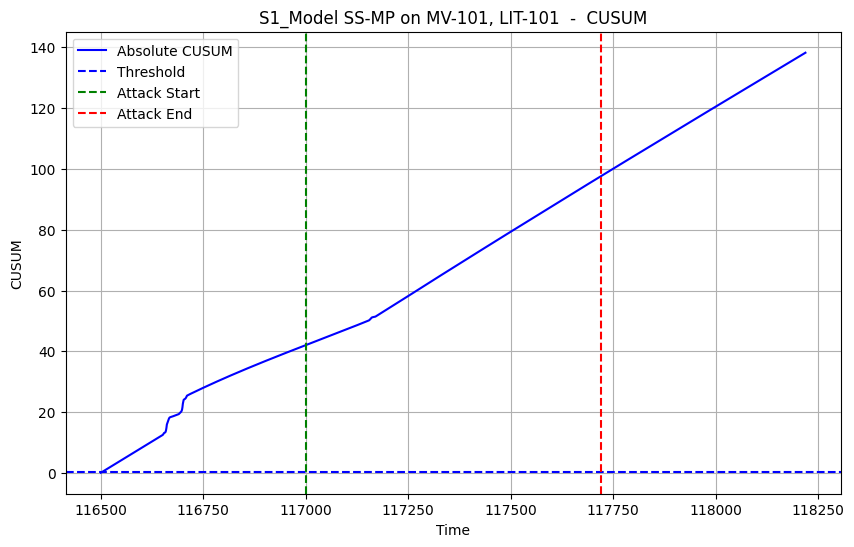

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


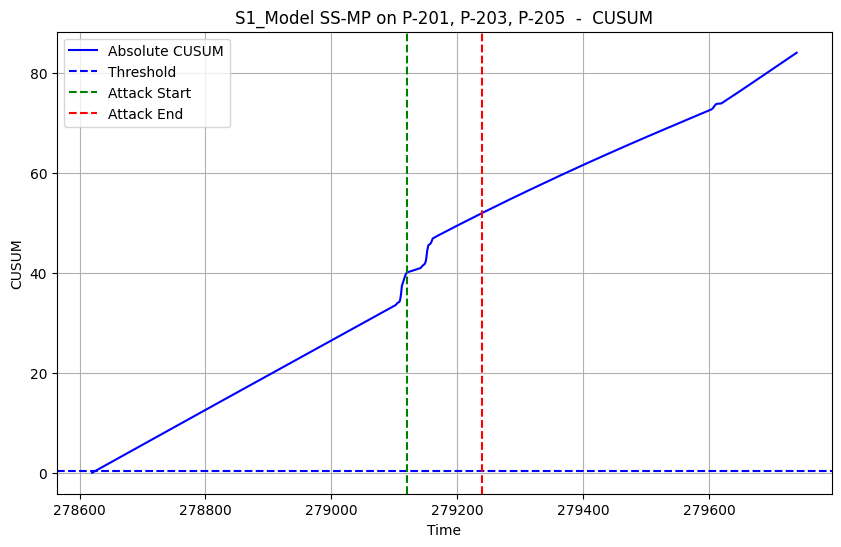

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


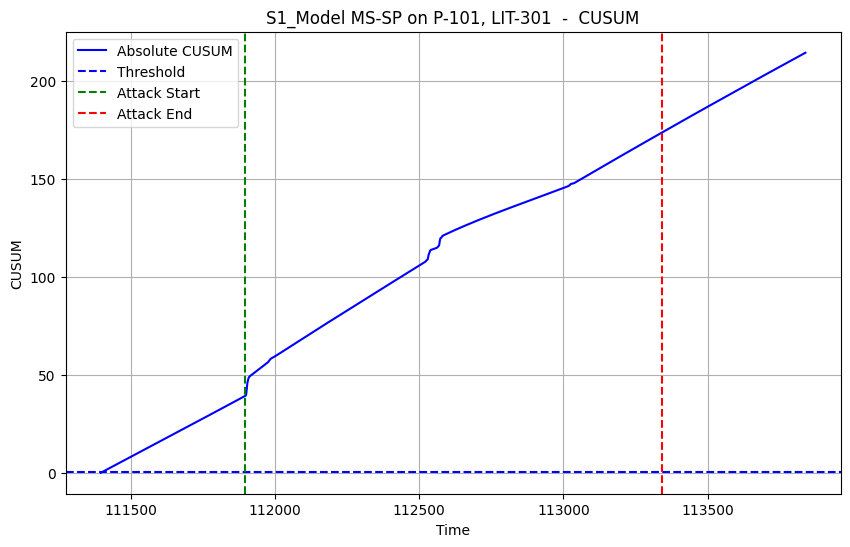

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


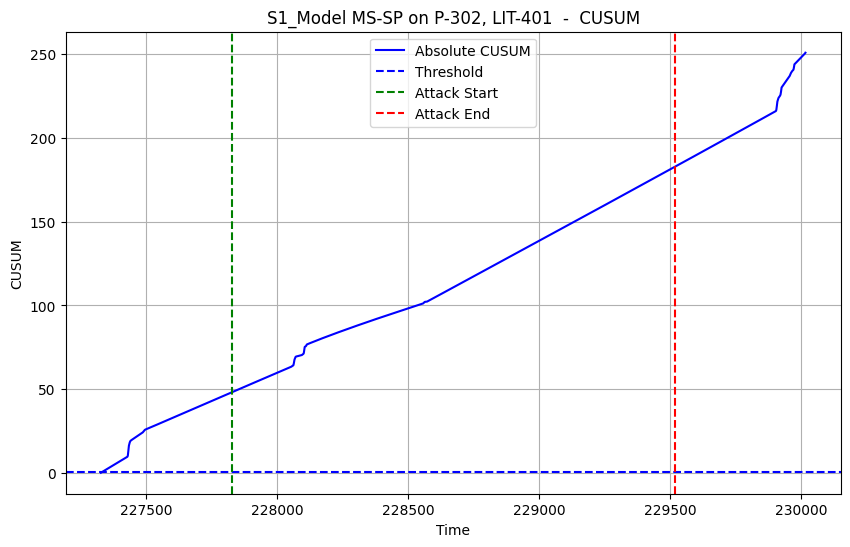

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


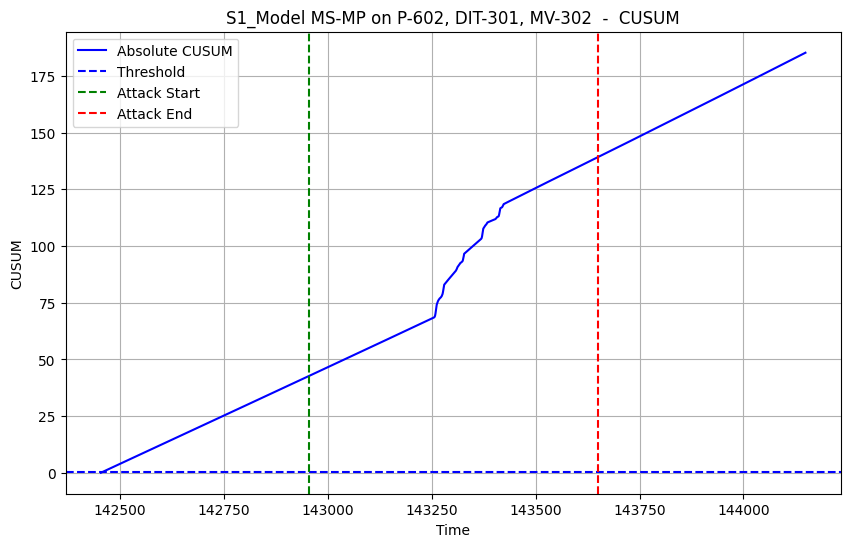

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


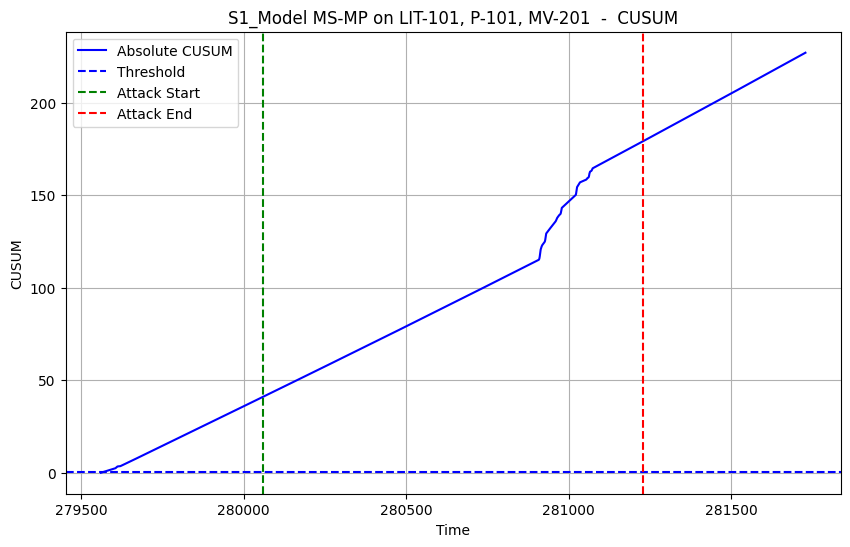

None


In [ ]:
getIntervals(s2_df, s3_df, "S2_S3_Model", s3_threshold)

## S4 Attack Predictions

In [ ]:
s4_threshold = getThreshold(s3_df, s4_df, "S3_S4_Model")
s4_threshold

15057/15057 [==============================] - 24s 2ms/step
(481795, 9)
(481795, 9)


0.04630976348543485

15057/15057 [==============================] - 24s 2ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


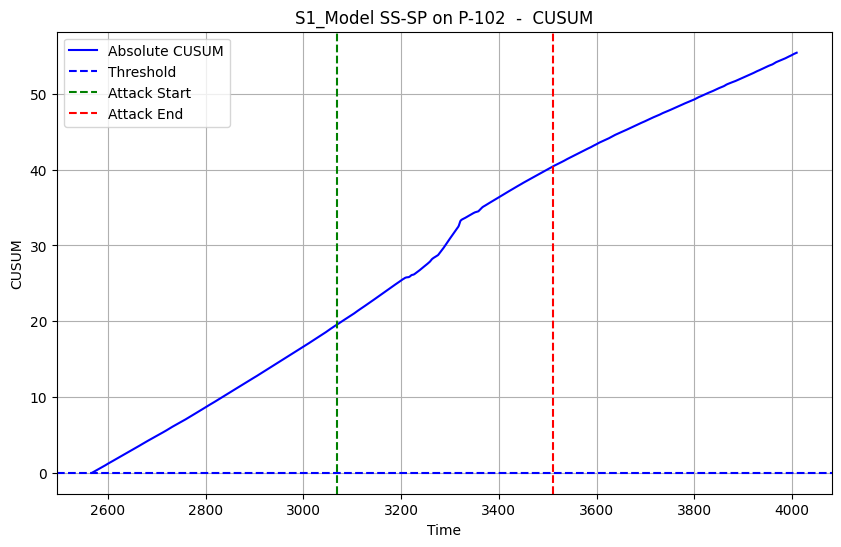

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


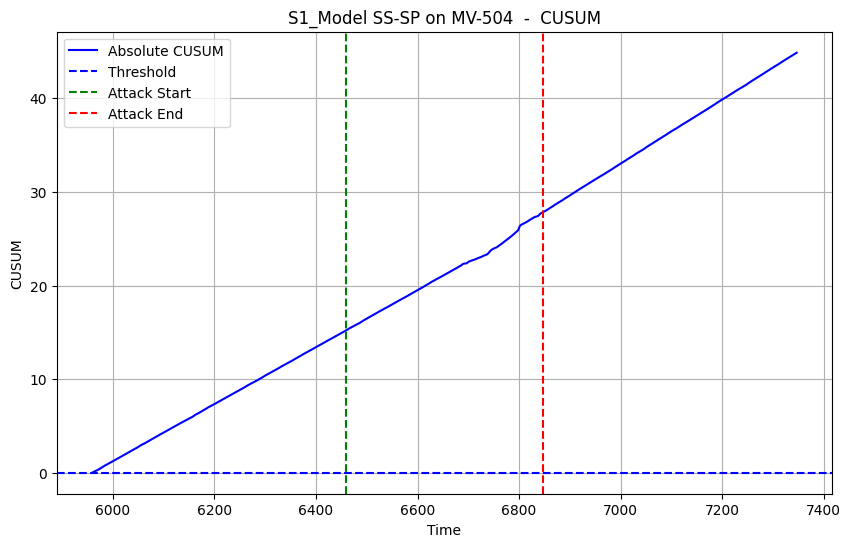

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


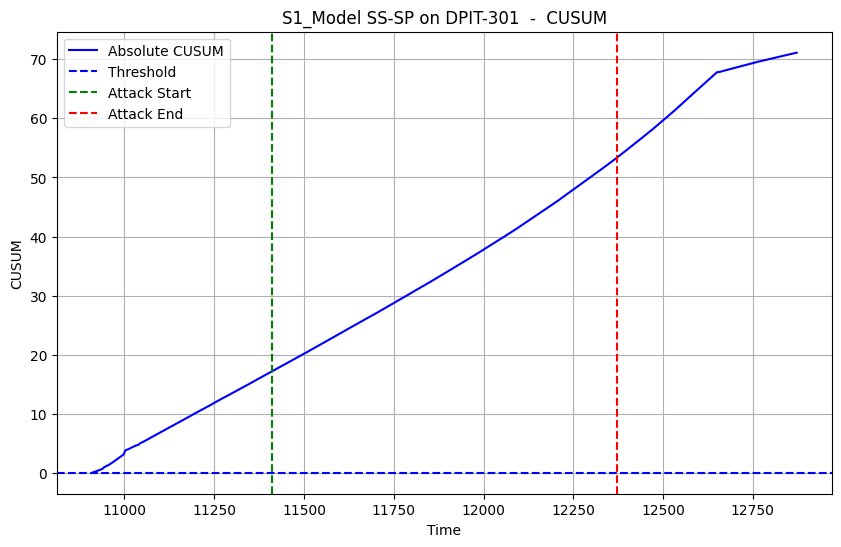

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


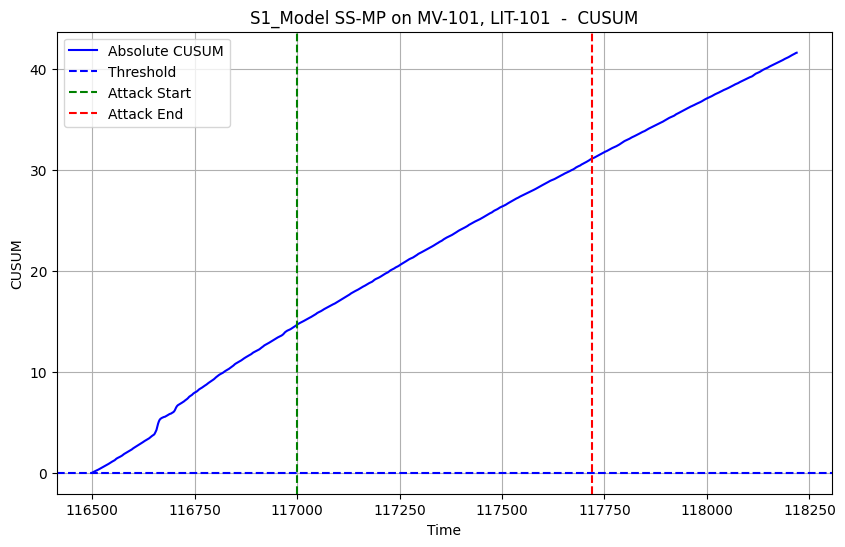

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


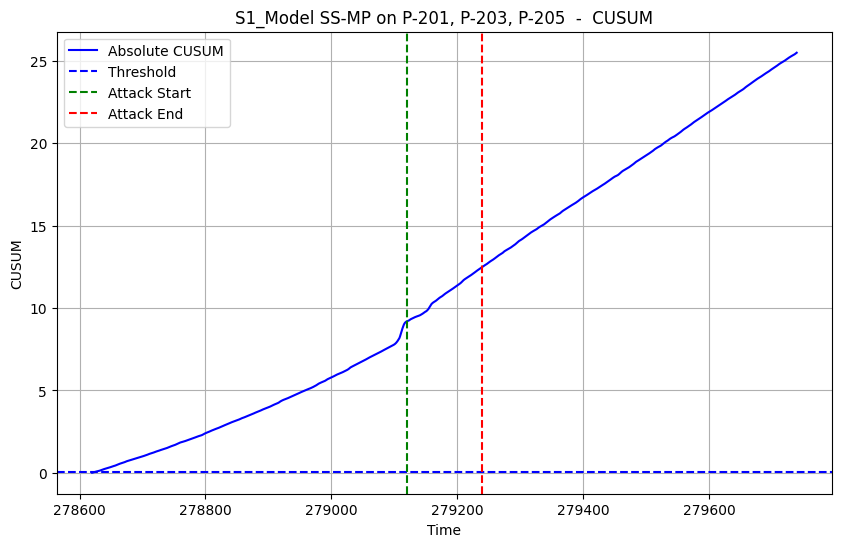

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


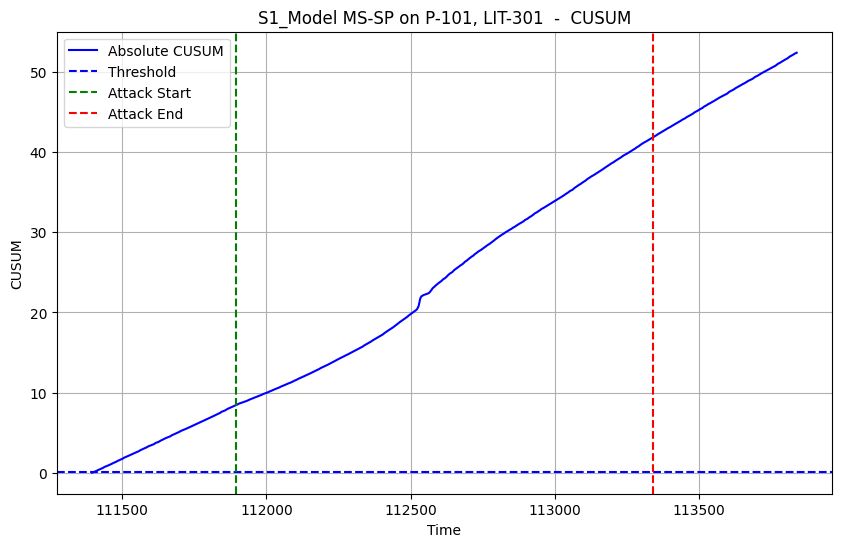

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


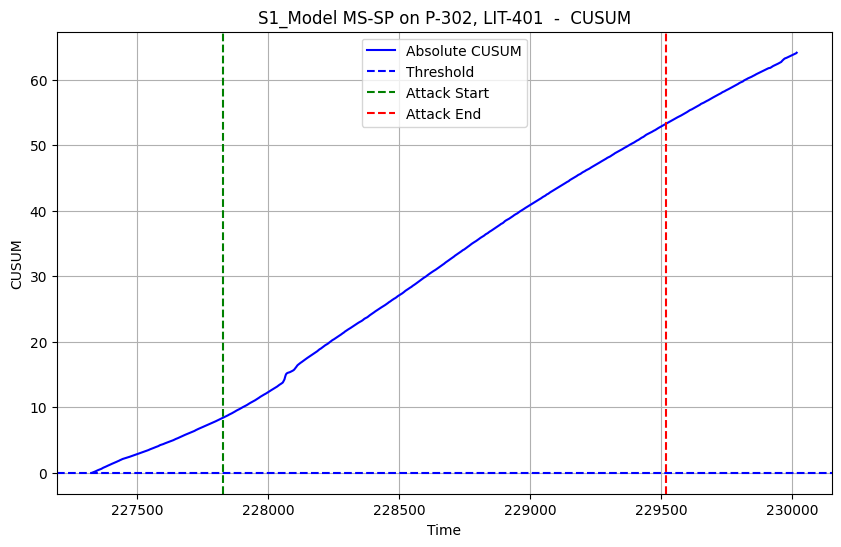

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


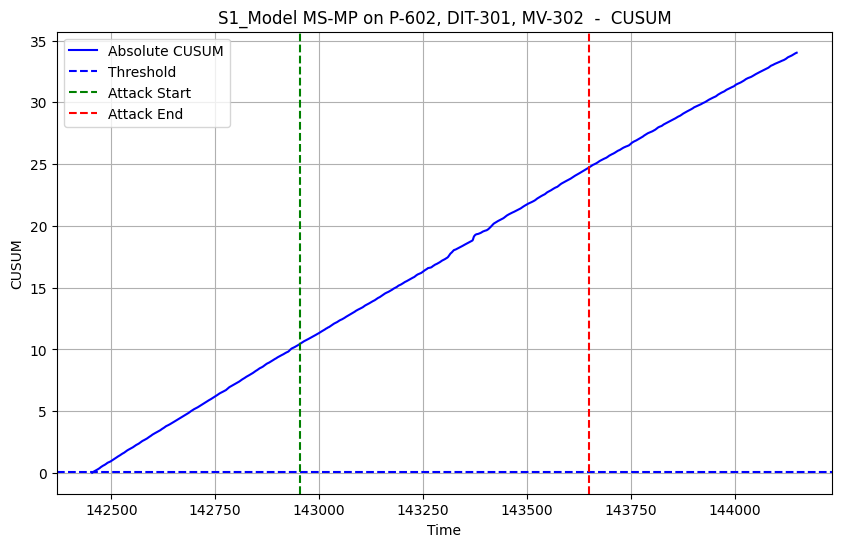

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


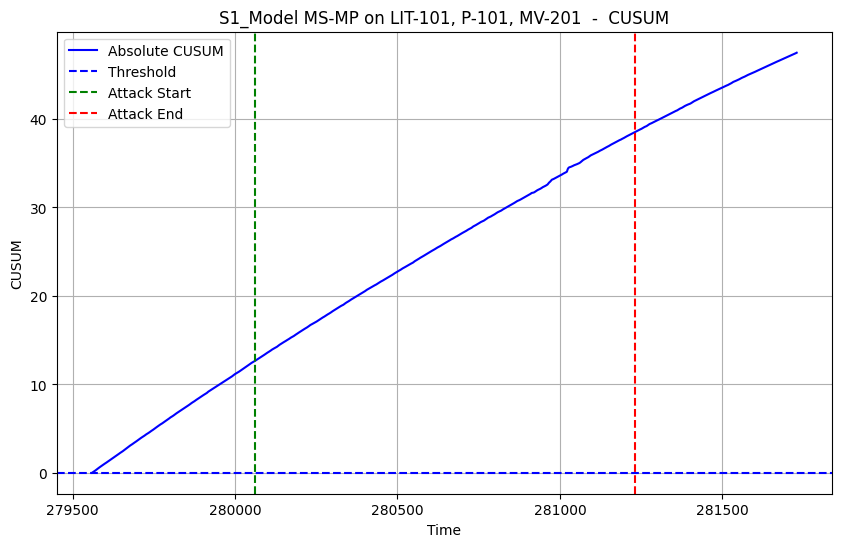

None


In [ ]:
getIntervals(s3_df, s4_df, "S3_S4_Model", s4_threshold)

## S5 Attack Predictions

In [ ]:
s5_threshold = getThreshold(s4_df, s5_df, "S4_S5_Model")
s5_threshold

15057/15057 [==============================] - 27s 2ms/step
(481795, 13)
(481795, 13)


0.15746312584104483

15057/15057 [==============================] - 26s 2ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


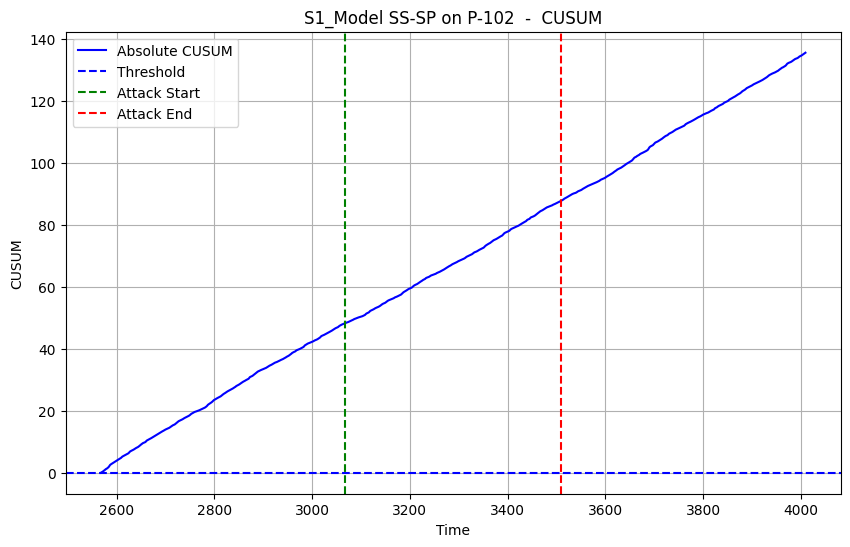

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


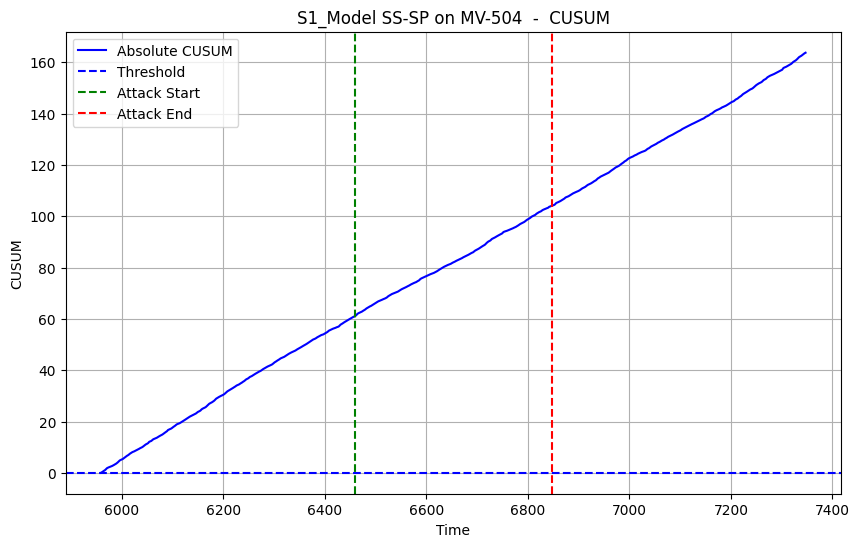

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


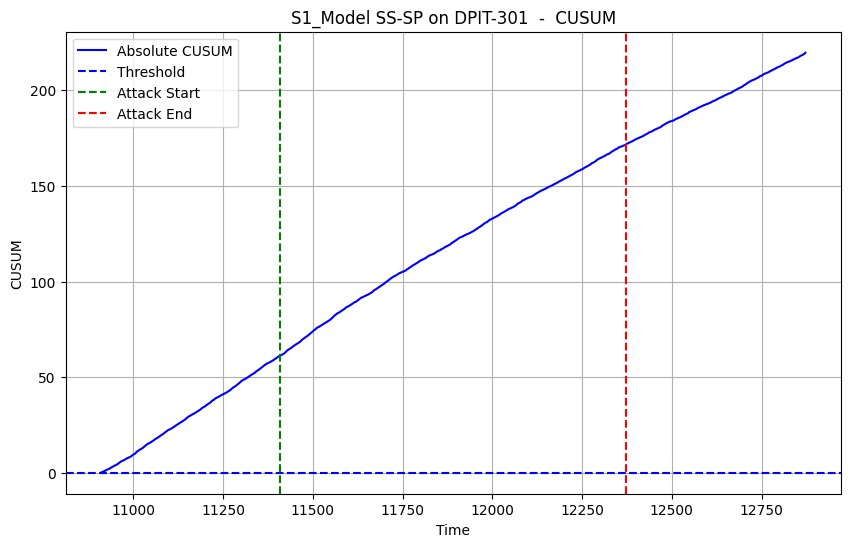

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


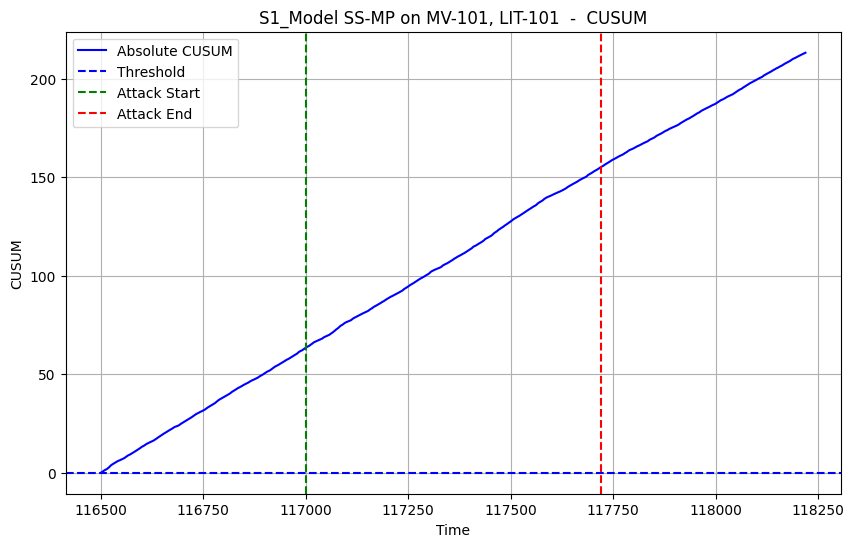

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


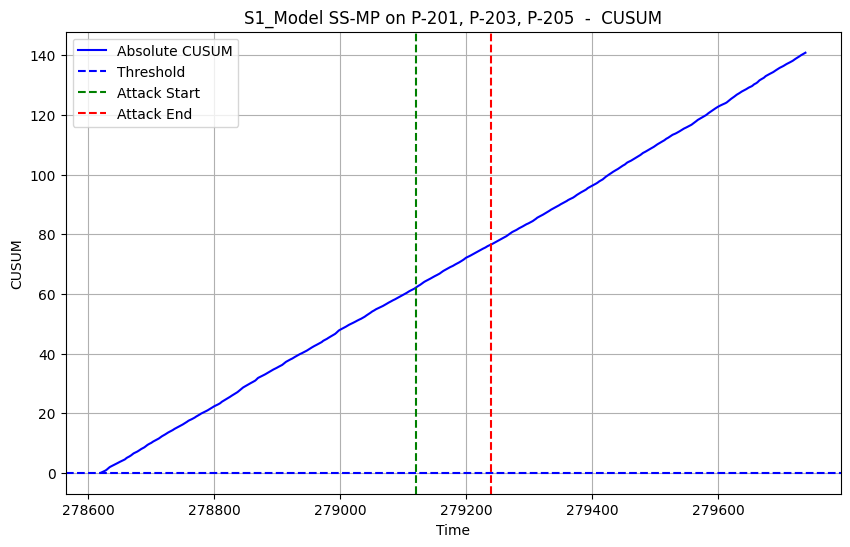

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


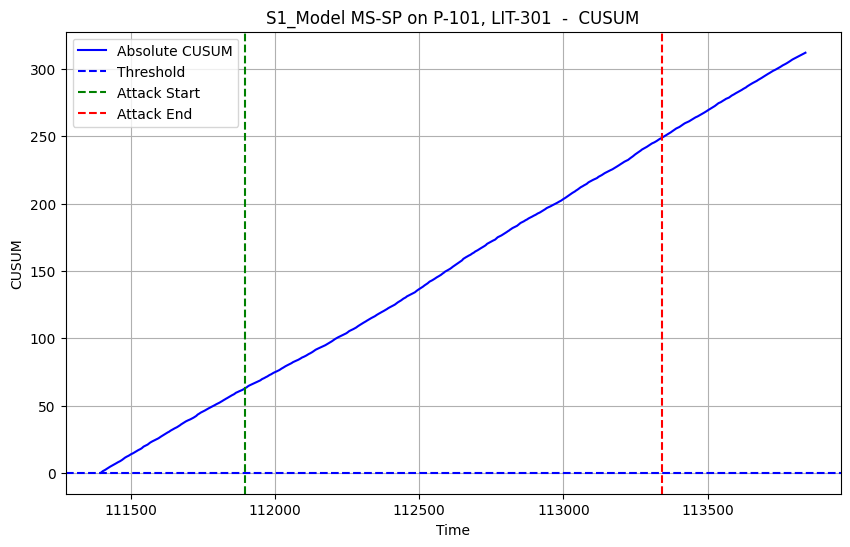

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


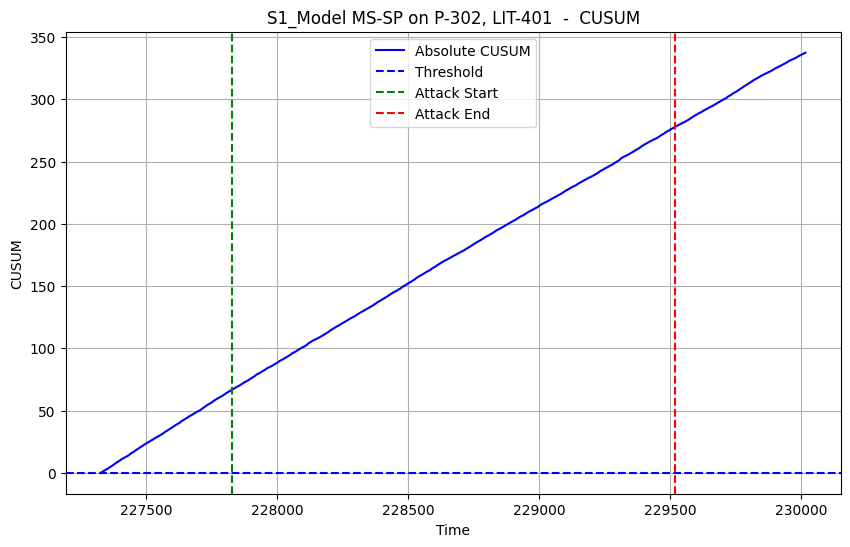

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


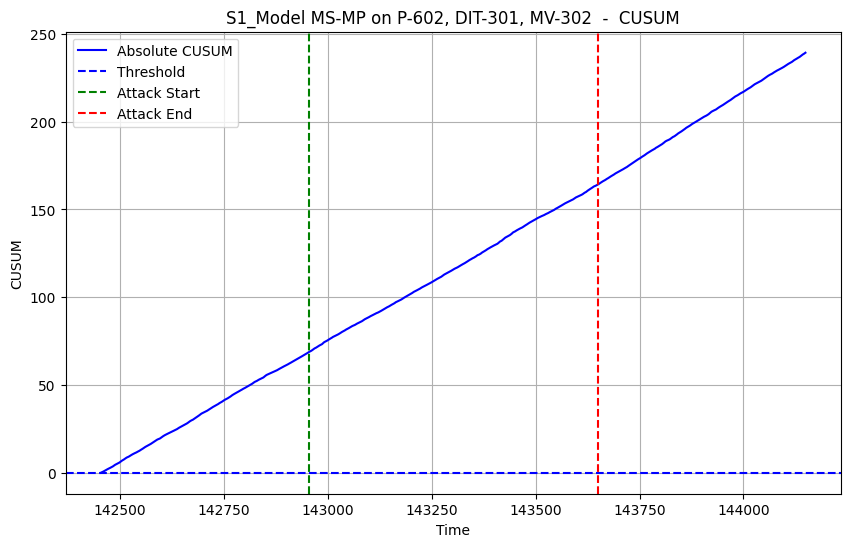

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


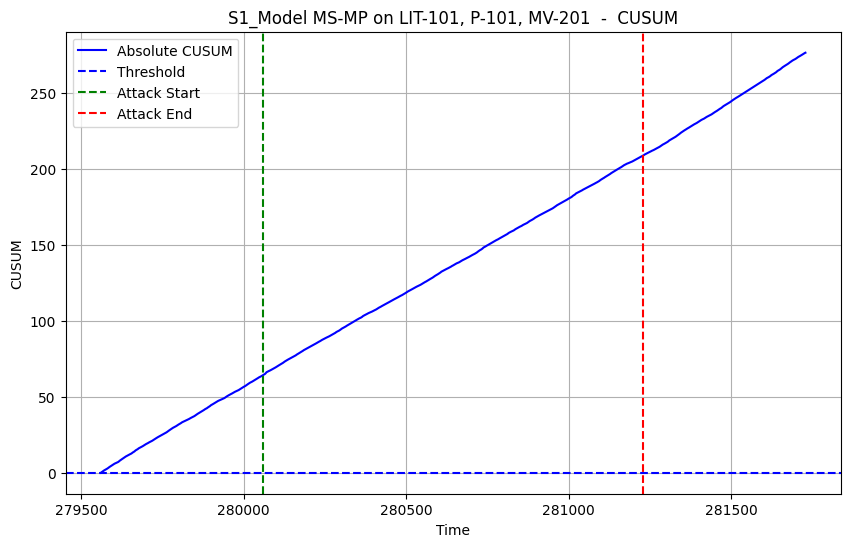

None


In [ ]:
getIntervals(s4_df, s5_df, "S4_S5_Model", s5_threshold)

## S6 Attack Predictions

In [ ]:
s6_threshold = getThreshold(s5_df, s6_df, "S5_S6_Model")
s6_threshold

15057/15057 [==============================] - 21s 1ms/step
(481795, 4)
(481795, 4)


0.18299593098588324

15057/15057 [==============================] - 22s 1ms/step
Start: 2015-12-28 10:51:08	End: 2015-12-28 10:58:30


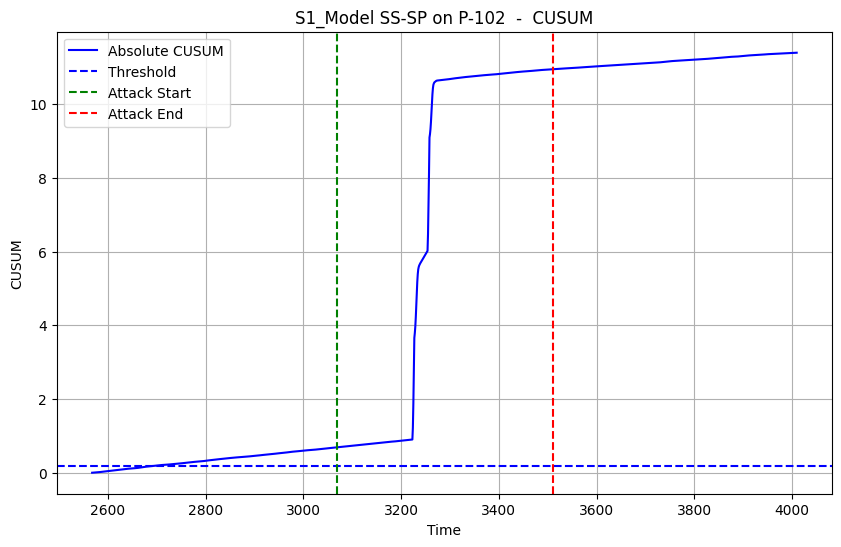

None
Start: 2015-12-28 11:47:39	End: 2015-12-28 11:54:08


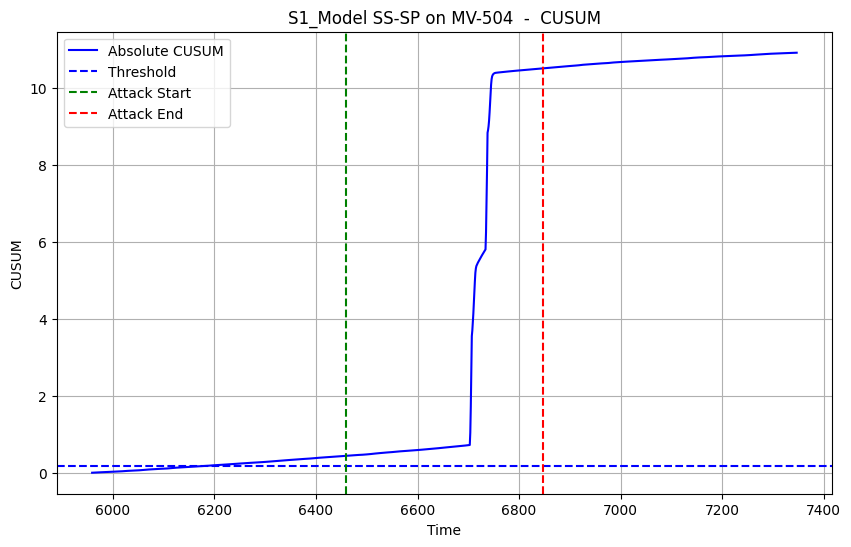

None
Start: 2015-12-28 13:10:10	End: 2015-12-28 13:26:13


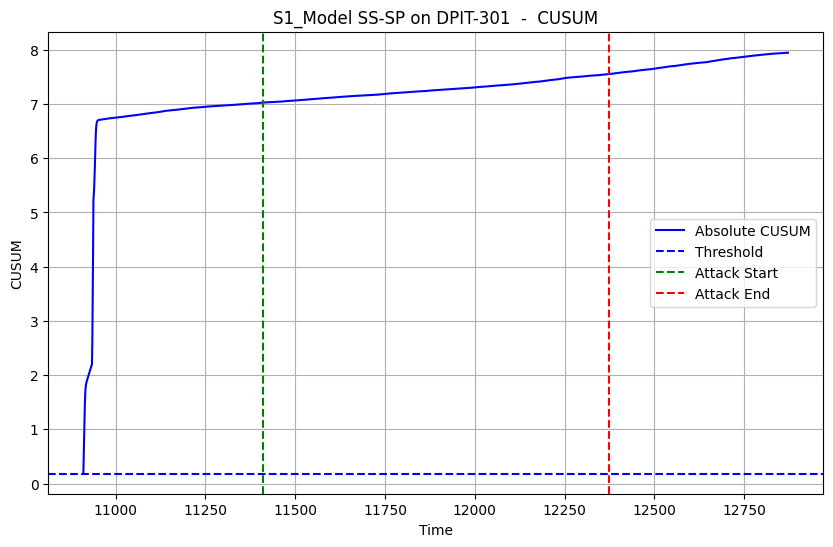

None
Start: 2015-12-29 18:30:00	End: 2015-12-29 18:42:00


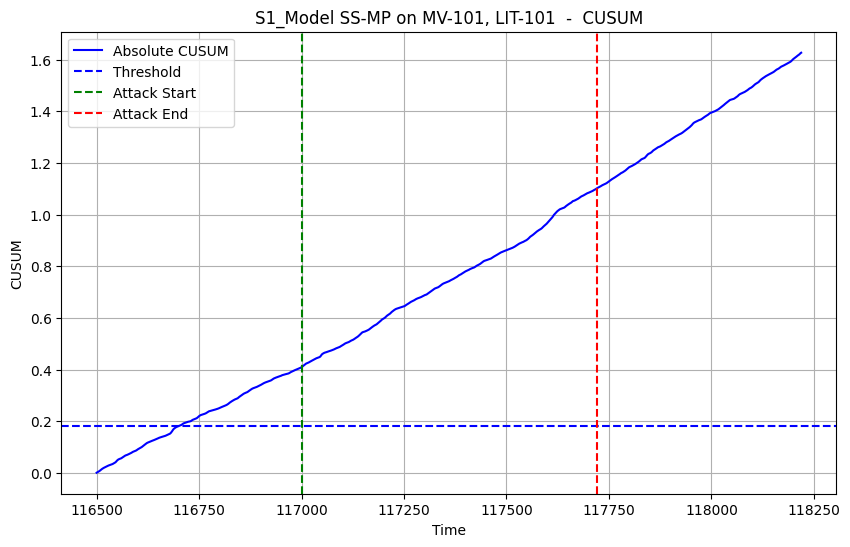

None
Start: 2015-12-31 15:32:00	End: 2015-12-31 15:34:00


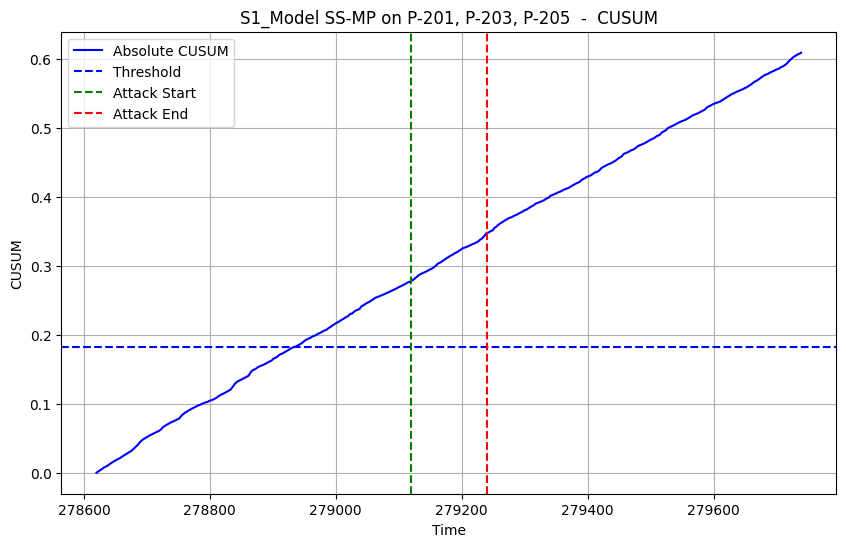

None
Start: 2015-12-29 17:04:56	End: 2015-12-29 17:29:00


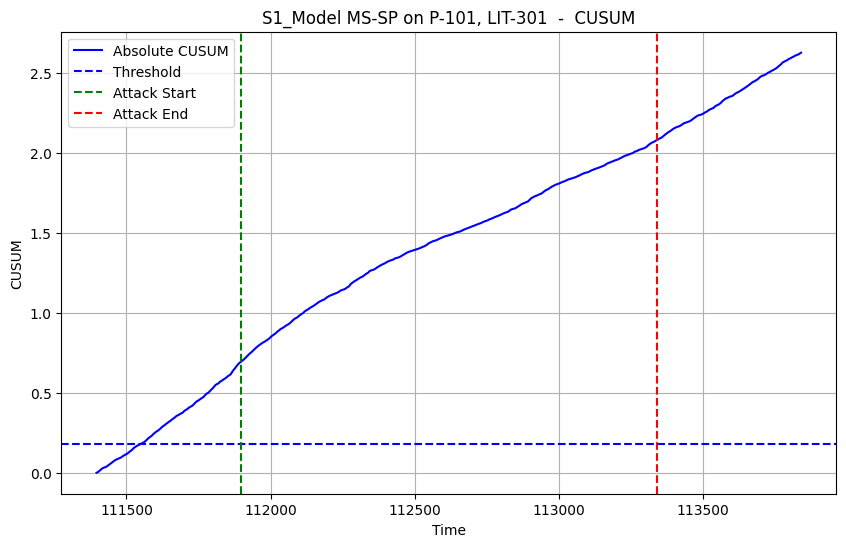

None
Start: 2015-12-31 01:17:08	End: 2015-12-31 01:45:18


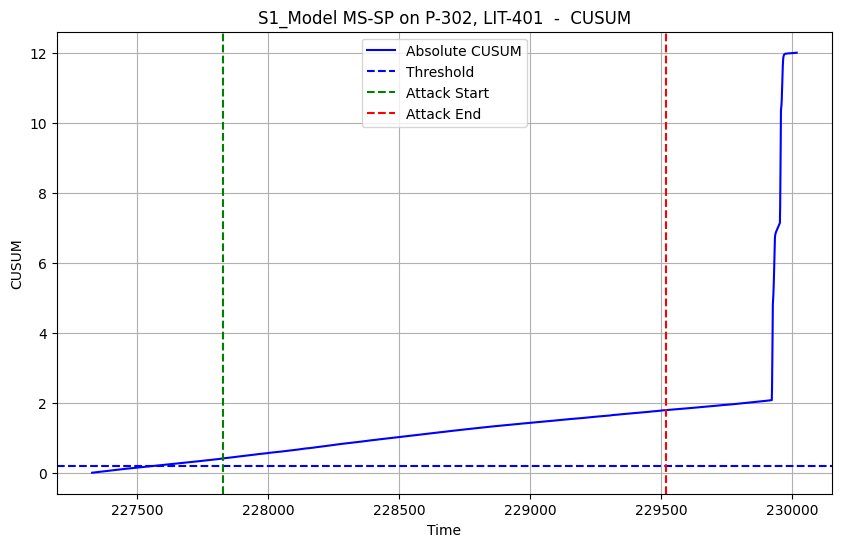

None
Start: 2015-12-30 01:42:34	End: 2015-12-30 01:54:10


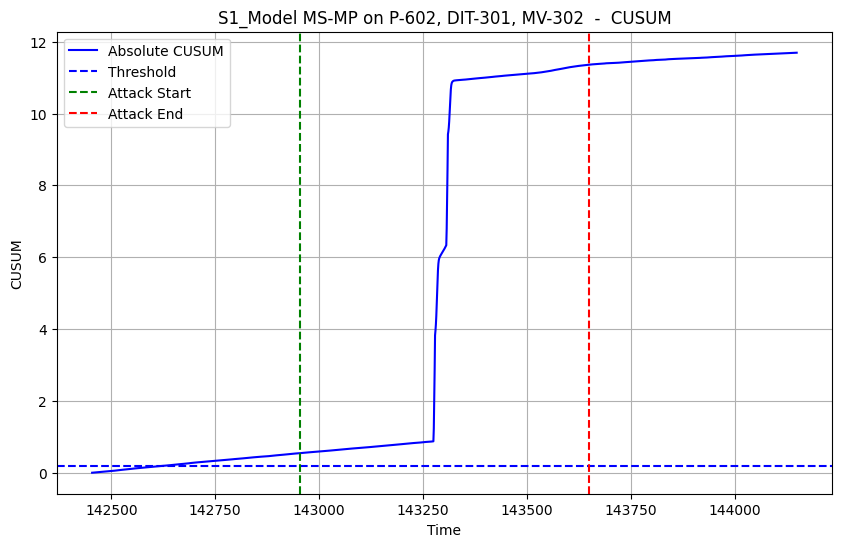

None
Start: 2015-12-31 15:47:40	End: 2015-12-31 16:07:10


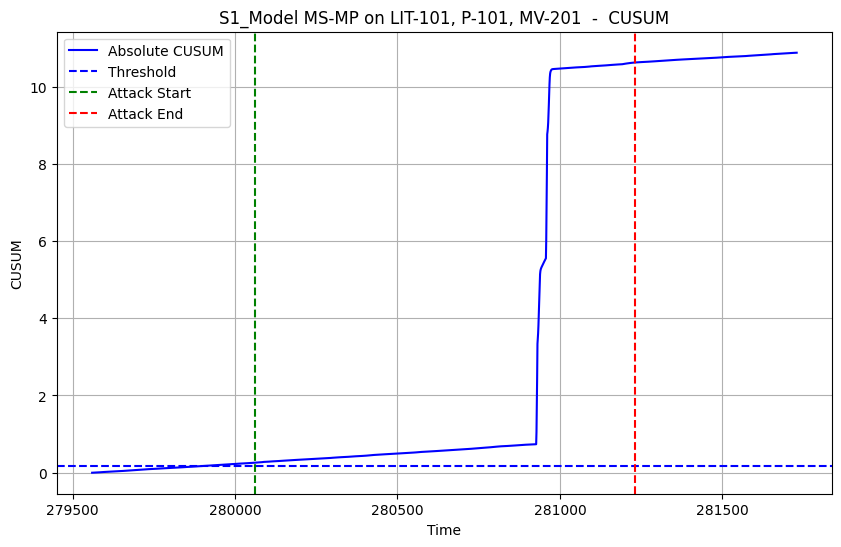

None


In [ ]:
getIntervals(s5_df, s6_df, "S5_S6_Model", s6_threshold)